In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = read_csv('GDP_DATA.csv')
df = df[df["Country Code"] == "IND"].T
df.columns = ["GDP"]
df = df.drop(df.index[[0,1,2,3,-1]])
df.head()
df.to_csv("GDP_India.csv")

1960-01-01    3.767927e+10
1961-01-01    3.992045e+10
1962-01-01    4.290086e+10
1963-01-01    4.927110e+10
1964-01-01    5.747078e+10
Name: GDP, dtype: float64


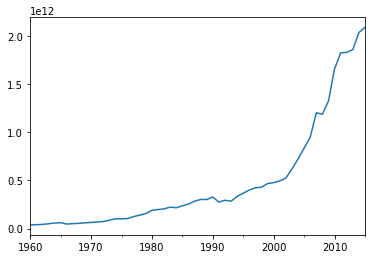

In [3]:
def parser(x):
    return datetime.strptime(x, '%Y')

series = read_csv('GDP_India.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

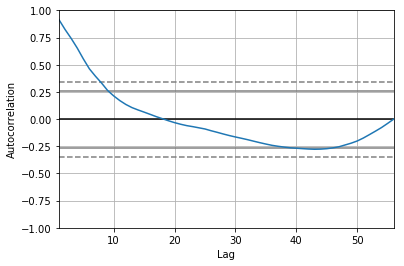

In [4]:
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                   55
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1442.542
Method:                       css-mle   S.D. of innovations    59374643081.682
Date:                Sun, 23 Apr 2017   AIC                           2893.084
Time:                        22:57:05   BIC                           2901.113
Sample:                    01-01-1961   HQIC                          2896.189
                         - 01-01-2015                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        3.729e+10   1.47e+10      2.543      0.014      8.55e+09   6.6e+10
ar.L1.D.GDP     0.4163      0.134      3.106      0.003         0.154     0.679
ar.L2.D.GDP     0.0468      0.139      0.337    

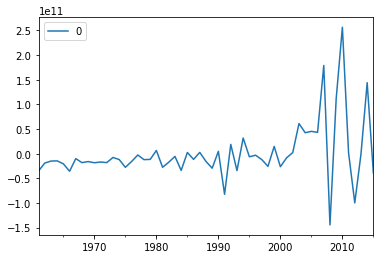

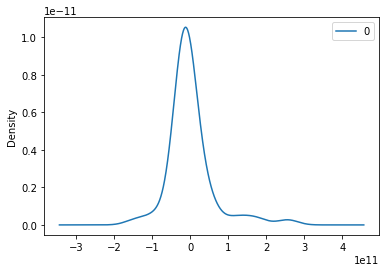

                  0
count  5.500000e+01
mean   2.829798e+08
std    5.995786e+10
min   -1.444397e+11
25%   -1.980667e+10
50%   -1.191591e+10
75%    2.519434e+09
max    2.562832e+11


In [5]:
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [6]:
def results(trainsize):
    X = series.values
    size = int(len(X) * trainsize)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(disp=False)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
#     print(len(str(int(error))))
    print mean_absolute_error(test,predictions)
#     plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

predicted=385916223062.826599, expected=399787263892.645020
predicted=417731435751.149292, expected=423160799040.859985
predicted=441738609046.118774, expected=428740690379.960999
predicted=443362706514.679138, expected=466866720520.973999
predicted=475386936551.234497, expected=476609148165.172974
predicted=497211774525.011414, expected=493954161367.562988
predicted=504491157781.191772, expected=523968381476.715027
predicted=537385333086.851196, expected=618356467437.026978
predicted=646690411573.489014, expected=721584805204.776978
predicted=802184454136.163696, expected=834214699568.140015
predicted=931684337109.854126, expected=949116769619.553955
predicted=1054827032781.244141, expected=1201071960529.750000
predicted=1380647624386.413086, expected=1186913419021.340088
predicted=1386596465822.398926, expected=1323896417147.060059
predicted=1336694563324.480469, expected=1656562168648.570068
predicted=1860762470611.403564, expected=1822989507290.050049
predicted=2006311368006.004883

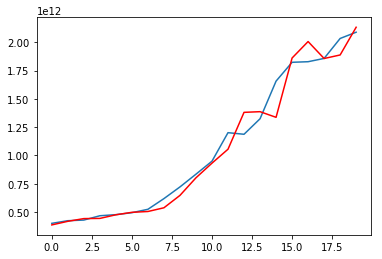

predicted=65395244746.983070, expected=68532117824.123802
predicted=71049962300.514084, expected=72716439112.100006
predicted=75199478521.701401, expected=87014945186.315598
predicted=91157182707.495163, expected=101271278198.505005
predicted=107011636438.666779, expected=100199707352.022995
predicted=101127891284.261703, expected=104518508553.080994
predicted=109659593961.675278, expected=123617837582.481995
predicted=130850023902.710739, expected=139708121469.132996
predicted=144358969472.281250, expected=155674658263.583008
predicted=164063874568.682434, expected=189592920294.446014
predicted=210945912073.065430, expected=196883842005.062012
predicted=205206676561.492004, expected=204235073533.230011
predicted=211731600680.804138, expected=222089924399.492004
predicted=233203304962.620087, expected=215878839023.118011
predicted=220911111242.574646, expected=236589423202.641052
predicted=243491393839.163544, expected=253352444883.274994
predicted=263962829976.109894, expected=2839269

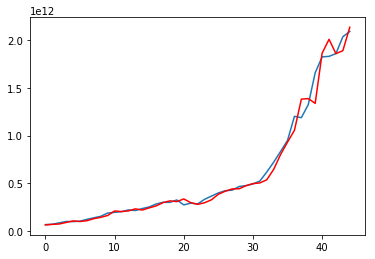

In [7]:
results(0.66)
results(0.2)